Position: 18 Residue: R
Position: 25 Residue: R
Position: 38 Residue: A
Position: 45 Residue: G
Position: 50 Residue: E


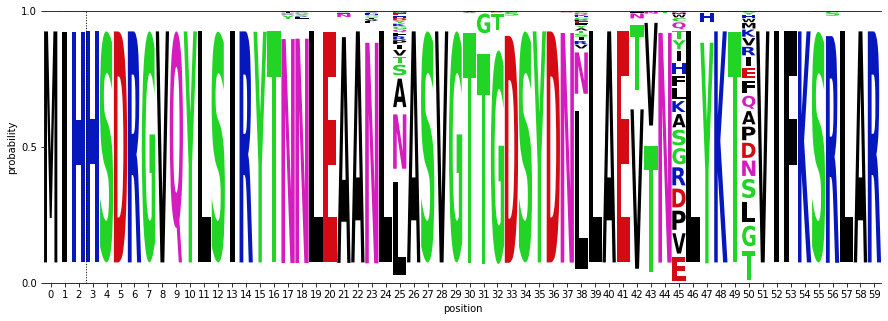

In [29]:
from model import cnn_model_builder, lstm_model_builder
from denoiser import reconstruct_sequence, prepare_sequence
import numpy as np
import logomaker
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

model = lstm_model_builder()

seq = 'MIHHSDRGVQYLSIRYTNRLEAANLRASVGTTGDSYDNALAETVNGLYKTEVIFKSRLAR'
seq_p,pos = prepare_sequence(seq)
seq_r = reconstruct_sequence(seq_p, model)

categories_ = ['A','C','D','E','F','G','H',
               'I','K','L','M','N','P','Q',
               'R','S','T','V','W','Y']

s_logo = pd.DataFrame(seq_r, columns = categories_)

ss_logo = logomaker.Logo(s_logo,
                         width=.95,
                         vpad=.15,
                         baseline_width = 0,
                         fade_probabilities=False,
                         figsize = (15,5),
                         stack_order='small_on_top')

ss_logo.style_spines(spines=['left','right'], visible=False)

ss_logo.ax.set_xticks(range(len(s_logo)))
ss_logo.ax.set_yticks([0, .5, 1])
ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
ss_logo.ax.set_ylabel('probability')
ss_logo.ax.set_xlabel('position')
for a in sorted(list(set(pos))):
    print('Position: ' + str(a) + ' Residue: ' + seq[a])

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 20)]          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 512)           567296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               656384    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 60, 256)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60, 256)           394240    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 60, 512)           1050624   
_________________________________________________________________
time_distributed (TimeDistri (None, 60, 20)            10260 

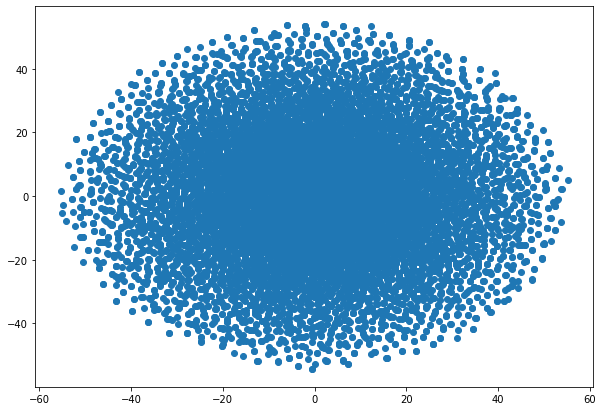

In [27]:
import random
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model_hidden = tf.keras.models.Model(inputs=[model.inputs],
                     outputs=[model.get_layer('bidirectional_1').output])

vecs = []
for a in range(10000):
    seq = ''.join([random.choice('ACDEFGHIKLMNPQRSTVWY') for _ in range(60)])
    seq_p, _ = prepare_sequence(seq)
    vec = model_hidden.predict(seq_p[np.newaxis,:])
    vecs.append(vec.flatten())
    
X_embedded=TSNE(n_components=2).fit_transform(vecs)
vecs = np.array(vecs)

plt.figure(figsize = (10,7))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

In [25]:
len(vecs)

10